# Link Analysis

# Table of Content

- [Setup](#setup)
- [Hits](#hits)
- [PageRank](#pagerank)
- [SimRank](#simrank)

---
# <a name='setup'></a> Setup

In [1]:
%matplotlib inline

In [2]:
from collections import namedtuple
from copy import deepcopy

import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

## Load Data

In [3]:
Edge = namedtuple('Edge', ('source', 'dest'))

In [4]:
def load_graph_gen(filename):
    with open(filename, 'r') as input_file:
        for line in input_file:
            source, dest = line.strip().split(',')
            yield Edge(source, dest)

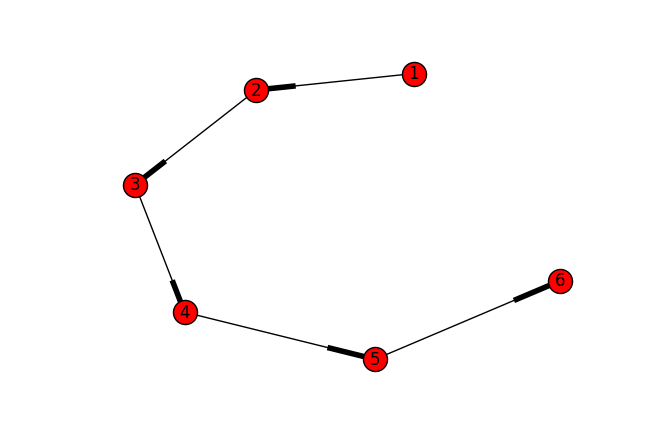

In [5]:
graph1_gen = load_graph_gen('dataset/graph_1.txt')
G1 = nx.DiGraph(graph1_gen)
nx.draw(G1, arrows=True, with_labels=True)

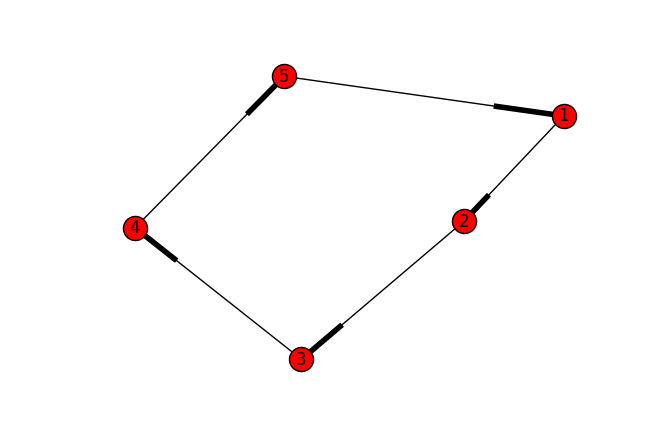

In [6]:
graph2_gen = load_graph_gen('dataset/graph_2.txt')
G2 = nx.DiGraph(graph2_gen)
nx.draw(G2, arrows=True, with_labels=True)

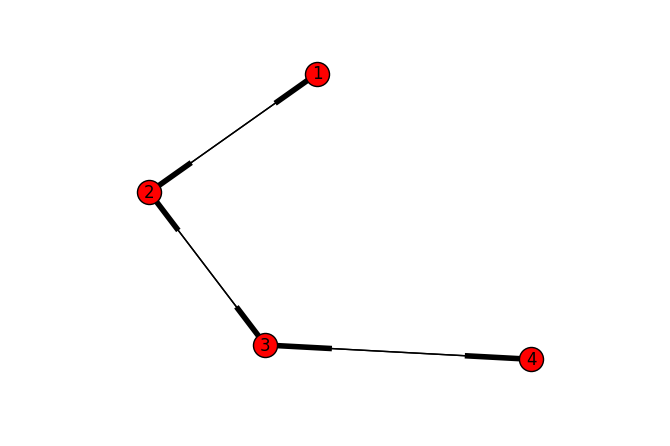

In [7]:
graph3_gen = load_graph_gen('dataset/graph_3.txt')
G3 = nx.DiGraph(graph3_gen)
nx.draw(G3, arrows=True, with_labels=True)

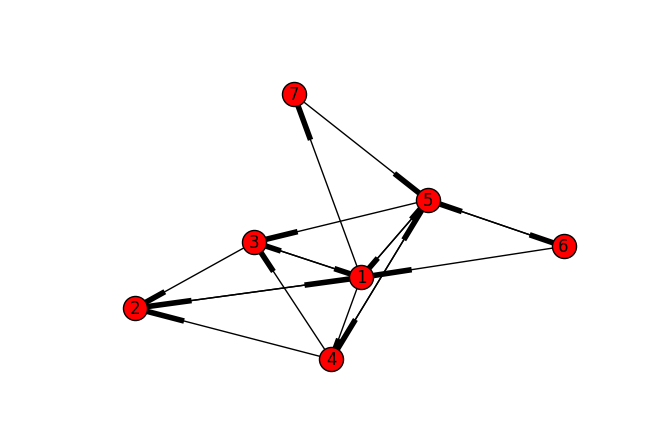

In [8]:
graph4_gen = load_graph_gen('dataset/graph_4.txt')
G4 = nx.DiGraph(graph4_gen)
nx.draw(G4, arrows=True, with_labels=True)

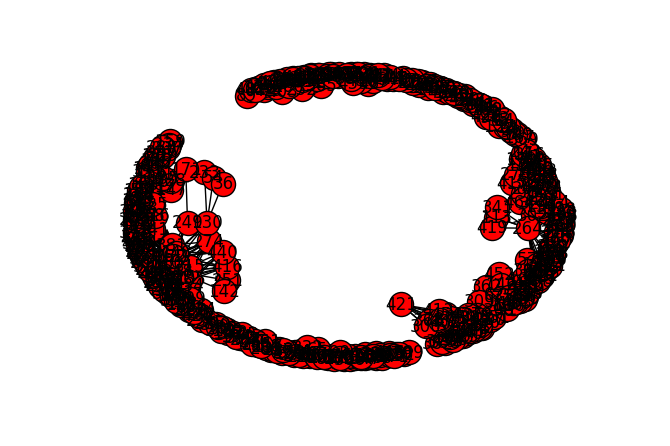

In [9]:
graph5_gen = load_graph_gen('dataset/graph_5.txt')
G5 = nx.DiGraph(graph5_gen)
nx.draw(G5, arrows=True, with_labels=True)

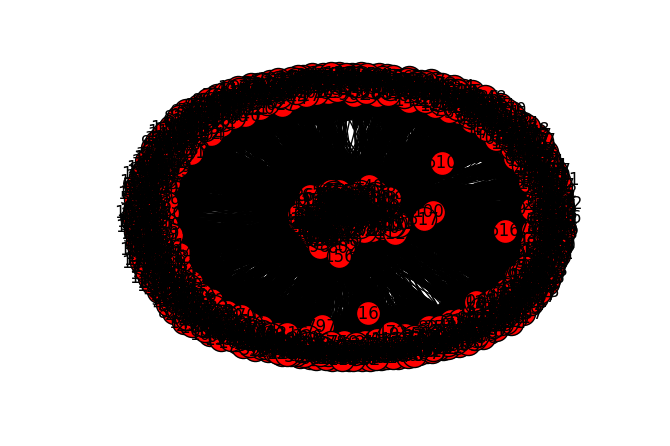

In [10]:
graph6_gen = load_graph_gen('dataset/graph_6.txt')
G6 = nx.DiGraph(graph6_gen)
nx.draw(G6, arrows=True, with_labels=True)

---
# <a name='hits'></a> Hits

---
# <a name='pagerank'></a> Page Rank

In [11]:
def pagerank_new(graph, *, damping_factor=0.85, episilon=1e-06):
    node_num = graph.number_of_nodes()
    index_key_map = {index: key for key, index in zip(graph.nodes(), range(node_num))}
    adj_matrix = np.array(nx.to_numpy_matrix(graph))
    out_degs = np.sum(adj_matrix, axis=1)

    dangle_nodes = list()
    for index, o_deg in enumerate(graph.out_degree().values()):
        if not o_deg:
            dangle_nodes.append(index)

    pageranks = np.array([1/node_num for _ in range(node_num)])
    pre_pageranks = np.array([0 for _ in range(node_num)])
    delta = np.sum(np.abs(pageranks - pre_pageranks))

    while delta > episilon:
        pre_pageranks = deepcopy(pageranks)

        pagerank_quotas = np.array(
            [pr/deg if deg else 0 for pr, deg in zip(pre_pageranks, out_degs)]
        )
        dangle_sum = sum([pre_pageranks[d_n]/node_num for d_n in dangle_nodes])

        pageranks = (
            (1 - damping_factor) / node_num +
            damping_factor *
            (
                adj_matrix.transpose().dot(pagerank_quotas[:, np.newaxis]) +
                dangle_sum
            )
        )
        pageranks = pageranks.flatten()
        pageranks /= np.sum(pageranks)
        delta = np.sum(np.abs(pageranks - pre_pageranks))
    pageranks = {key: pageranks[index] for index, key in index_key_map.items()}
    return pageranks

In [12]:
pagerank_new(G5)

{'1': 0.0016258960185490572,
 '10': 0.0019589722345675267,
 '100': 0.001726664583359611,
 '101': 0.0016820910855827578,
 '102': 0.0016840097450440464,
 '103': 0.0017173127685771827,
 '104': 0.0098655598024145977,
 '105': 0.0026149491792068886,
 '106': 0.0019675879777905315,
 '107': 0.0017064389843362176,
 '108': 0.0017333824876803146,
 '109': 0.0024496520042439759,
 '11': 0.0018162252848453254,
 '110': 0.0016820910855827578,
 '111': 0.0016820910855827578,
 '112': 0.0016734247296520325,
 '113': 0.0018549500044359971,
 '114': 0.0025657805522435731,
 '115': 0.0016734247296520325,
 '116': 0.0025657805522435731,
 '117': 0.0018171855622935631,
 '118': 0.0018993033243108711,
 '119': 0.0019096264158621416,
 '12': 0.0017591265049564449,
 '120': 0.0017502706037194752,
 '121': 0.0019096264158621416,
 '122': 0.013571094138466666,
 '123': 0.0016840097450440464,
 '124': 0.001907144574466372,
 '125': 0.0016734247296520325,
 '126': 0.002382285604238477,
 '127': 0.001726664583359611,
 '128': 0.00182056

In [13]:
nx.pagerank(G5, alpha=0.85)

{'1': 0.001603734389831242,
 '10': 0.0019445861510855734,
 '100': 0.0017077100624216745,
 '101': 0.0016623128606216627,
 '102': 0.001663309055476453,
 '103': 0.0016974145500283616,
 '104': 0.010282818288558097,
 '105': 0.00262782583034231,
 '106': 0.0019567030460644025,
 '107': 0.0016866555593337872,
 '108': 0.0017146417739277032,
 '109': 0.0024692499250012403,
 '11': 0.001798506824833717,
 '110': 0.0016623128606216627,
 '111': 0.0016623128606216627,
 '112': 0.0016528775034403904,
 '113': 0.0018439169370187004,
 '114': 0.0025794868369118998,
 '115': 0.0016528775034403904,
 '116': 0.0025794868369118998,
 '117': 0.0018006721673997866,
 '118': 0.001885384752060649,
 '119': 0.0018996558495978754,
 '12': 0.0017400750943329746,
 '120': 0.001732883296671679,
 '121': 0.0018996558495978754,
 '122': 0.014134526821428423,
 '123': 0.001663309055476453,
 '124': 0.0018945987204684435,
 '125': 0.0016528775034403904,
 '126': 0.0023927296637962178,
 '127': 0.0017077100624216745,
 '128': 0.0018078689660

### Reference 
[PageRank Lecture Note](http://www.ccs.northeastern.edu/home/daikeshi/notes/PageRank.pdf)

---
# <a name='simrank'></a> SimRank